In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df1 = df.drop(['date' , 'street' , 'country' , 'statezip' ] , axis = 1) #drop metrick witch cant help me somehow to preidict

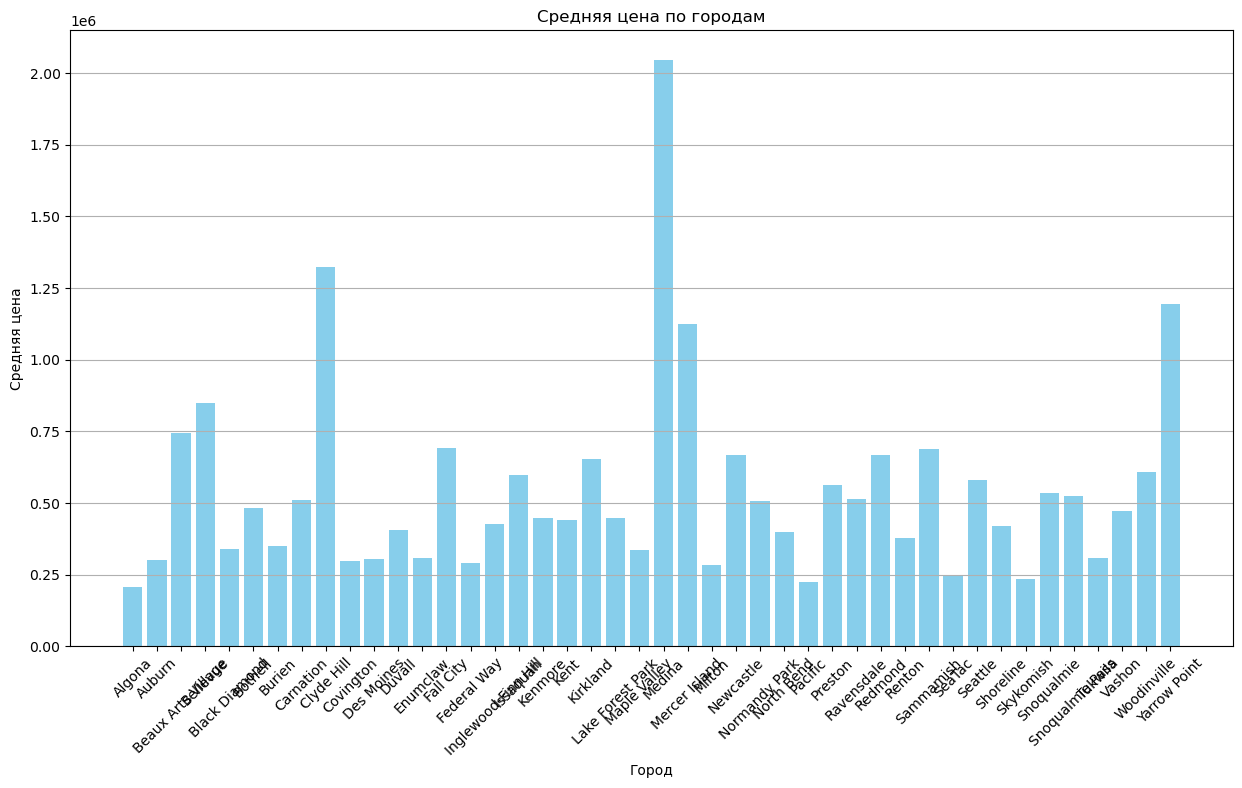

In [5]:
mean_price_by_city = df1.groupby('city')['price'].mean().reset_index()

#I got hipotes that maybe that "city" can help me to buil ML model 
plt.figure(figsize=(15, 8))
plt.bar(mean_price_by_city['city'], mean_price_by_city['price'], color='skyblue')
plt.xlabel('Город')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по городам')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()

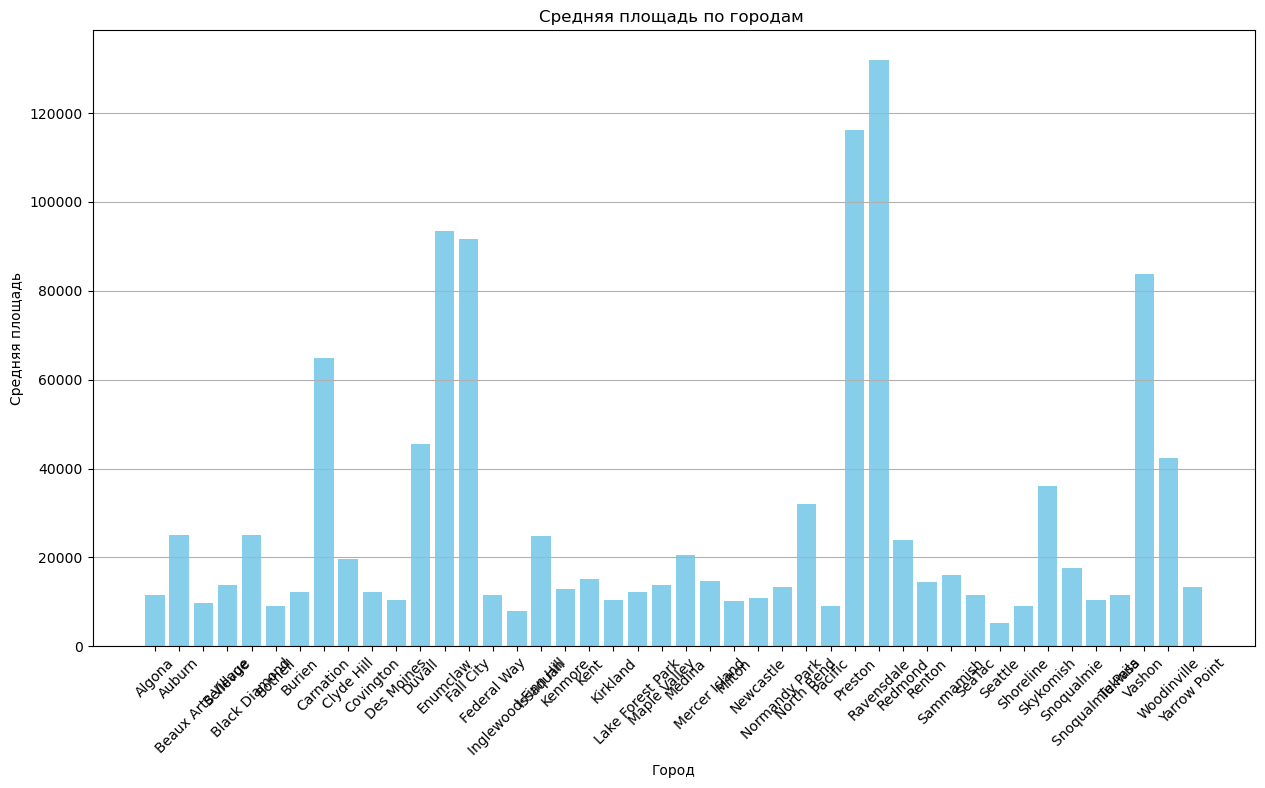

In [6]:
mean_sqft_lot_by_city = df1.groupby('city')['sqft_lot'].mean().reset_index()
plt.figure(figsize=(15, 8))
plt.bar(mean_sqft_lot_by_city['city'], mean_sqft_lot_by_city['sqft_lot'], color='skyblue')
plt.xlabel('Город')
plt.ylabel('Средняя площадь')
plt.title('Средняя площадь по городам ')
plt.xticks(rotation=45)  # Повернуть названия городов для улучшения читаемости
plt.grid(axis='y')
plt.show()

In [7]:
df1 = df1.drop('city' , axis = 1 ) 

In [8]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


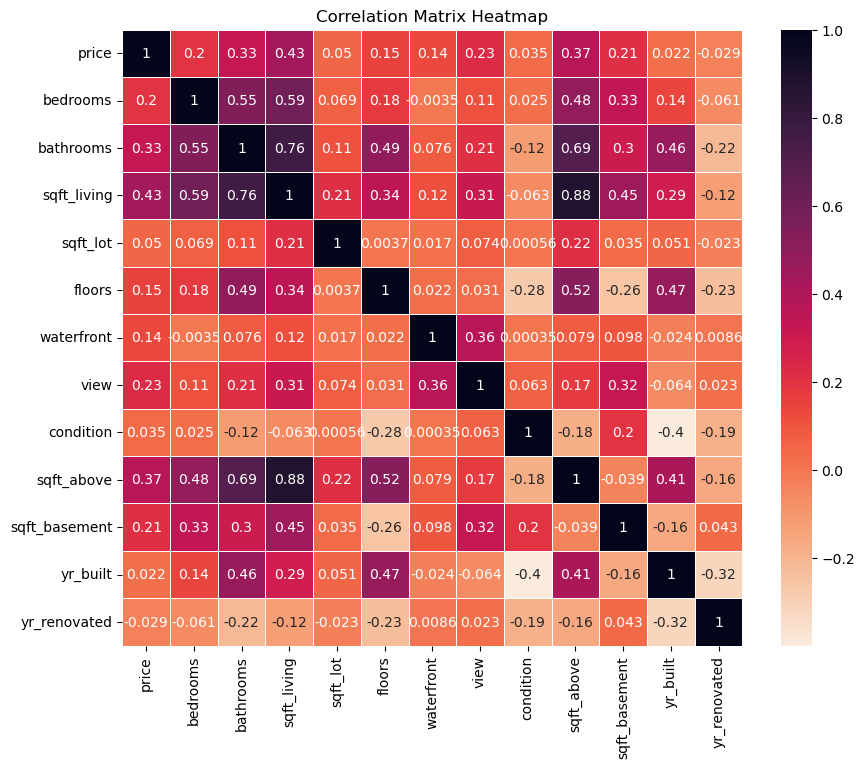

In [9]:
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
df.drop(columns=["country", "statezip","street",'date','city'], inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [12]:
X = df.drop('price' , axis = 1 )
y = df['price']

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size= 0.2 , random_state= 42)

In [16]:
y_train.mean() / y_test.mean()

0.9387107891282438

In [17]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [19]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled , y_train_scaled)

LinearRegression()

In [35]:
y_lin_scl_test_pred = lin_reg.predict(X_test_scaled )
y_lin_scl_train_pred = lin_reg.predict(X_train_scaled)
y_pred_lr = sc_y.inverse_transform(y_lin_scl_test_pred.reshape(-1, 1)).flatten()
y_train_pred_lr = sc_y.inverse_transform(y_train_pred_lr_scaled.reshape(-1, 1)).flatten()

In [36]:
mse_train_lin = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lin =mean_squared_error(y_test ,y_pred_lr)
print("Linear Regression Mean Squared Error of Train:", mse_train_lin)
print("Linear Regression Mean Squared Error of Test:", mse_test_lin)

Linear Regression Mean Squared Error of Train: 64764812546.40725
Linear Regression Mean Squared Error of Test: 986782555807.9146


In [37]:
r2_lr_train = r2_score(y_train, y_train_pred_lr)
r2_lr_test = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Train Score:", r2_lr_train)
print("Linear Regression R2 Test Score:", r2_lr_test)

Linear Regression R2 Train Score: 0.5441854906705987
Linear Regression R2 Test Score: 0.03242035881230987


In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_reg = DecisionTreeRegressor(max_depth=5 , min_samples_leaf= 5
                               ,min_samples_split= 10 
                               ,max_features= 6)
dt_reg.fit(X_train_scaled , y_train_scaled)

DecisionTreeRegressor(max_depth=5, max_features=6, min_samples_leaf=5,
                      min_samples_split=10)

In [69]:
dt_tree_test_predict = dt_reg.predict(X_test_scaled)
dt_tree_train_predict = dt_reg.predict(X_train_scaled)
y_pred_dt = sc_y.inverse_transform(dt_tree_test_predict.reshape(-1, 1)).flatten()
y_train_pred_dt = sc_y.inverse_transform(dt_tree_train_predict.reshape(-1, 1)).flatten()

In [70]:
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mse_test_dt =mean_squared_error(y_test ,y_pred_dt)
print("Linear Regression Mean Squared Error of Train:", mse_train_dt)
print("Linear Regression Mean Squared Error of Test:", mse_test_dt)
r2_dt_train = r2_score(y_train, y_train_pred_dt)
r2_dt_test = r2_score(y_test, y_pred_dt)
print("Linear Regression R2 Train Score:", r2_dt_train)
print("Linear Regression R2 Test Score:", r2_dt_test)

Linear Regression Mean Squared Error of Train: 64708183425.74007
Linear Regression Mean Squared Error of Test: 988798660327.0978
Linear Regression R2 Train Score: 0.5445840462108031
Linear Regression R2 Test Score: 0.030443487944673664


In [76]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_scaled , y_train_scaled)



RandomForestRegressor()

In [80]:
forest.score(X_test_scaled , y_test_scaled)

0.027270515669002515

In [81]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

params = {
    'n_estimators':[100 , 200 , 300],
    'max_depth' :[None , 2 , 4 , 6] ,
    'min_samples_split' :[2 , 4 ,6 ,8]
}

grid_search = GridSearchCV(forest , param_grid=params , cv = 5 , 
                           scoring='neg_mean_squared_error',
                           return_train_score= True)
grid_search.fit(X_train_scaled , y_train_scaled)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4)

In [82]:
grid_search.best_estimator_.score(X_test_scaled , y_test_scaled)

0.029470078214347994

In [85]:
forest_test_predict = grid_search.best_estimator_.predict(X_test_scaled)
forest_train_predict = grid_search.best_estimator_.predict(X_train_scaled)

In [87]:
mean_squared_error(y_test_scaled ,forest_test_predict )

6.966148104658504

In [88]:
mean_squared_error(y_train_scaled , forest_train_predict)

0.09396393942534534

In [90]:
df = pd.read_csv('data.csv')

In [92]:
df = df.drop(['date' , 'street' , 'city' , 'statezip' , 'country'] , axis = 1 )

In [93]:
df.corr().price.to_frame().style.background_gradient()

,price
price,1.000000
bedrooms,0.200336
bathrooms,0.327110
sqft_living,0.430410
sqft_lot,0.050451
floors,0.151461
waterfront,0.135648
view,0.228504
condition,0.034915
sqft_above,0.367570


In [94]:
X_knn = df[['sqft_living' , 'sqft_above']]
y_knn = df['price']

In [95]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3,  random_state=42)

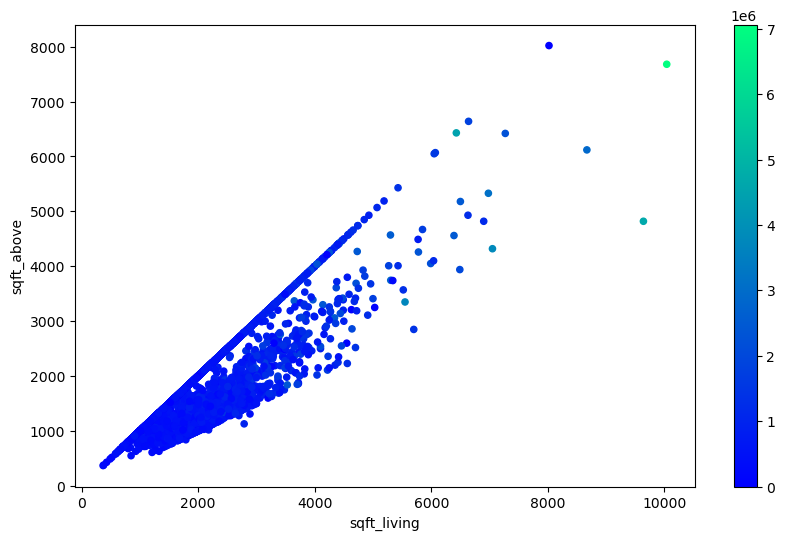

In [97]:
X_train_knn.plot.scatter(x='sqft_living', y='sqft_above', c=y_train_knn, cmap='winter', figsize=(10,6));

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train_knn, y_train_knn)
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': 13} 0.44214619195467675


In [108]:
knn_best.score(X_test_knn , y_test_knn)

0.05429927424468217

In [104]:
X_train_scl = sc_X.fit_transform(X_train_knn)
X_test_scl = sc_X.transform(X_test_knn)

In [106]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scl , y_train_knn)
lin_reg.score(X_test_scl , y_test_knn)

0.05355269009572794

Відносно цієї задачі, я поки що реально не знаю , як би я міг покращити , чи хоча б зробити більш-менш узагальнюючу модель . Я трохи у відчаї бо я майже тиждень витратив на те , аби отримати хоча б якийсь результат , але поки повна лажа , я надіслав те, що я зробив , аби показати хочаб щось. Я ревльно розумію , що це і висоного пальця не коштує , але треба надіслати щось . Я перепрошую за витрачений час на мене , маю надію , що зможу зробити щось ліпше ніж це 